# Task 2 – Quantitative Analysis using TA-Lib and PyNance

It covers:

- Loading stock price data
- Cleaning & preparing the data
- Calculating technical indicators using TA-Lib
- Calculating financial metrics using PyNance
- Visualizing stock performance


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta
import pynance as pn

plt.style.use('seaborn-v0_8')



In [5]:
symbol = "AAPL"  # you can change this
data = yf.download(symbol, start="2022-01-01", end="2024-01-01")

data.head()


C:\Users\Gerji\AppData\Local\Temp\ipykernel_1384\4043917590.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.270294,179.122429,174.058657,174.176186,104487900
2022-01-04,176.007782,179.181217,175.439697,178.877588,99310400
2022-01-05,171.325989,176.468119,171.051743,175.919628,94537600
2022-01-06,168.466019,171.698219,168.113415,169.151633,96904000
2022-01-07,168.632523,170.562047,167.515946,169.337730,86709100


In [6]:
# Remove missing data
data = data.dropna()

# Create daily returns
data["Return"] = data["Close"].pct_change()

data.head()


Price,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-01-03,178.270294,179.122429,174.058657,174.176186,104487900,NaN
2022-01-04,176.007782,179.181217,175.439697,178.877588,99310400,-0.012691
2022-01-05,171.325989,176.468119,171.051743,175.919628,94537600,-0.026600
2022-01-06,168.466019,171.698219,168.113415,169.151633,96904000,-0.016693
2022-01-07,168.632523,170.562047,167.515946,169.337730,86709100,0.000988


In [27]:
data["SMA20"] = ta.SMA(data["Close"].iloc[:, 0].values, timeperiod=20)

In [28]:
data["RSI"] = ta.RSI(data["Close"].iloc[:, 0].values, timeperiod=20)

In [24]:
data["MACD"], data["MACD_signal"], data["MACD_hist"] = ta.MACD(
    data["Close"].iloc[:, 0].values,  # <-- FIX APPLIED HERE
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

In [31]:
returns_series = data["Return"].dropna() # The column is already a Series, so remove .iloc[:, 0]
volatility = returns_series.std()
mean_return = returns_series.mean()

print("Mean Return:", mean_return)
print("Volatility:", volatility)

Mean Return: 0.00030223431627934437
Volatility: 0.018315874807992776


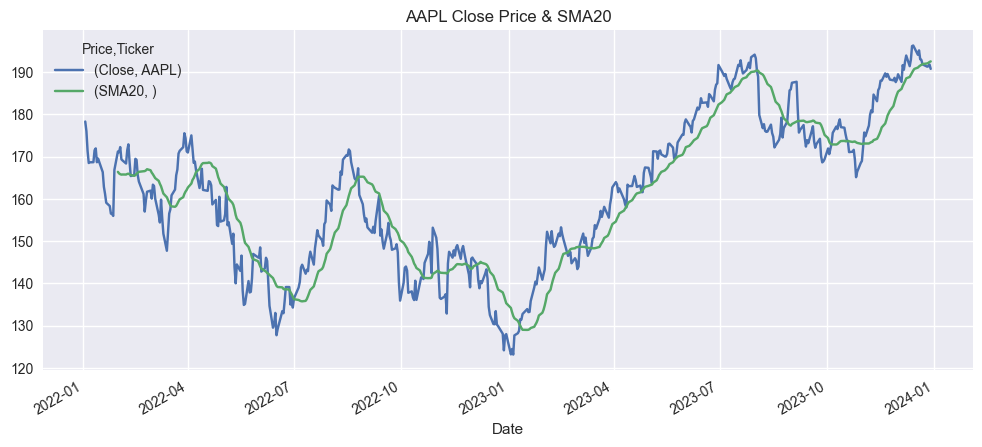

In [33]:
data[['Close', 'SMA20']].plot(figsize=(12,5), title=f"{symbol} Close Price & SMA20")
plt.show()


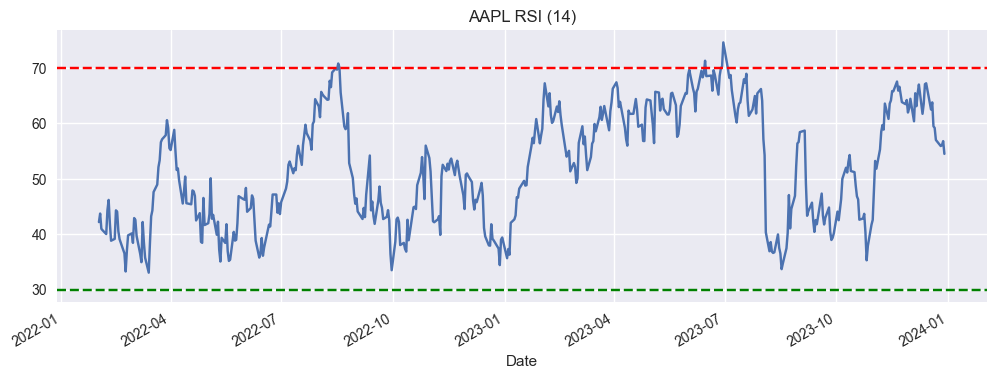

In [34]:
data['RSI'].plot(figsize=(12,4), title=f"{symbol} RSI (14)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()


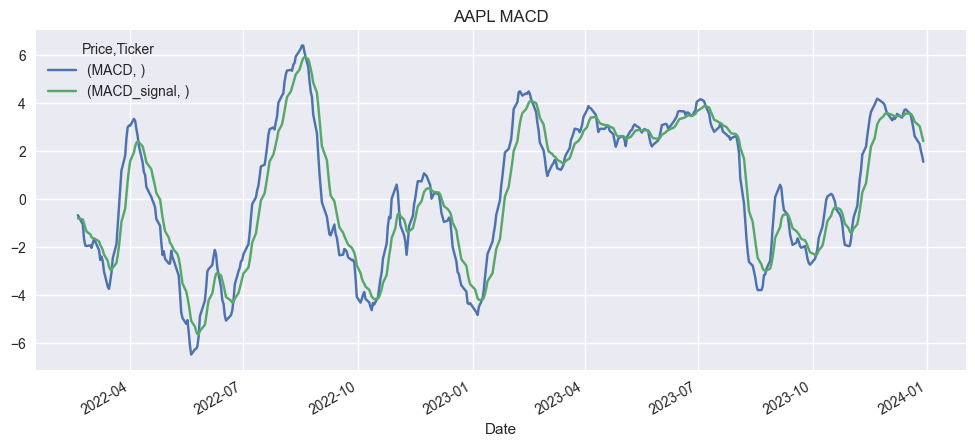

In [35]:
data[['MACD', 'MACD_signal']].plot(figsize=(12,5), title=f"{symbol} MACD")
plt.show()


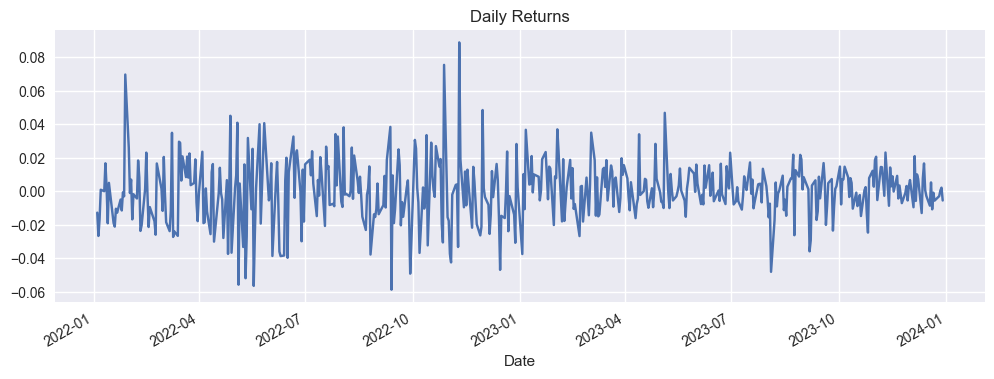

In [36]:
data['Return'].plot(figsize=(12,4), title="Daily Returns")
plt.show()
